<a href="https://colab.research.google.com/github/GanugapatiSaiSowmya/ML-Lab-Codes-CSE23219/blob/main/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1 (using IRCTC stock price)

In [3]:
# Write a function to calculate the entropy associated with your dataset
import pandas as pd
import numpy as np
from math import log2

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

#Equal Width Binning Function
def equal_width_binning(series, bins=4):
    """
    Convert continuous numeric data into categorical bins using equal width binning.
    Returns: pandas Series with bin labels
    """
    # Create bins
    binned_series = pd.cut(series, bins=bins, labels=False, include_lowest=True)
    return binned_series

#Calculate the entropy of a categorical pandas Series
def calculate_entropy(series):
    # Get counts of each category
    counts = series.value_counts(normalize=True)  # relative frequencies
    entropy = -sum(p * log2(p) for p in counts if p > 0)
    return entropy

# Clean numeric columns if they contain commas
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Bin the Price column into 4 equal-width bins
price_bins = equal_width_binning(df['Price'], bins=4)

# Calculate entropy of the binned data
entropy_value = calculate_entropy(price_bins)
print("\nEntropy of Price (4 bins):", entropy_value)



Entropy of Price (4 bins): 1.60613777529728


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A2

In [5]:
# Calculate the Gini index value for your dataset
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Equal Width Binning
def equal_width_binning(series, bins=4):
    binned_series = pd.cut(series, bins=bins, labels=False, include_lowest=True)
    return binned_series

# Gini Index Calculation
def calculate_gini(series):
    proportions = series.value_counts(normalize=True)
    gini = 1 - sum(p**2 for p in proportions)
    return gini

# Clean numeric column
df['Price'] = df['Price'].replace({',': ''}, regex=True).astype(float)

# Bin the Price column into 4 categories
price_bins = equal_width_binning(df['Price'], bins=4)

gini_value = calculate_gini(price_bins)
print("\nGini Index of Price (4 bins):", gini_value)



Gini Index of Price (4 bins): 0.5917646489572749


A3

In [6]:
# Write your own module for detecting the feature / attribute for the root note of a Decision Tree.
import pandas as pd
import numpy as np
from math import log2

def equal_width_binning(series, bins=4):
    #Convert continuous numeric data into categorical bins
    return pd.cut(series, bins=bins, labels=False, include_lowest=True)

def calculate_entropy(series):
    #Calculate entropy of a categorical series
    proportions = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in proportions if p > 0)

def information_gain(df, feature, target):
    #Calculate information gain for a given feature
    total_entropy = calculate_entropy(df[target])
    values = df[feature].unique()

    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        weighted_entropy += weight * calculate_entropy(subset[target])

    return total_entropy - weighted_entropy

def find_root_node(df, target):
    #Find the best feature for root node based on Information Gain
    features = [col for col in df.columns if col != target]
    gains = {}
    for feature in features:
        gains[feature] = information_gain(df, feature, target)
    root = max(gains, key=gains.get)
    return root, gains

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Clean numeric columns
numeric_cols = ["Price", "Open", "High", "Low", "Volume"]
for col in numeric_cols:
    df[col] = df[col].replace({',': '', 'M':'e6', 'K':'e3'}, regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Convert numeric features to categorical via binning
for col in numeric_cols:
    df[col] = equal_width_binning(df[col], bins=4)

target_col = "Price"

# Find root node
root, gains = find_root_node(df, target_col)

print("Information Gain for each feature:")
for f, g in gains.items():
    print(f"{f}: {g:.4f}")

print("\nBest Feature (Root Node):", root)


Information Gain for each feature:
Date: 1.6061
Month: 1.2083
Day: 0.0694
Open: 1.3230
High: 1.4696
Low: 1.3746
Volume: 0.1202
Chg%: 1.3918
Unnamed: 9: 1.6061
Unnamed: 10: 1.6061

Best Feature (Root Node): Date


A4

In [7]:
# Use equal width or frequency binning for converting the attribute to categorical valued. The binning type should be a parameter to the function built for binning.
import pandas as pd
import numpy as np
from math import log2

def custom_binning(series, bins=4, binning_type="width"):
    """
    Custom binning function for continuous data.
    Parameters:
        series (pd.Series): The numeric column to bin
        bins (int): Number of bins to create (default = 4)
        binning_type (str): 'width' for equal-width, 'frequency' for equal-frequency (default = 'width')
    """
    if binning_type == "width":
        return pd.cut(series, bins=bins, labels=False, include_lowest=True)
    elif binning_type == "frequency":
        return pd.qcut(series, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning_type. Use 'width' or 'frequency'.")

def calculate_entropy(series):
    proportions = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in proportions if p > 0)

def information_gain(df, feature, target):
    total_entropy = calculate_entropy(df[target])
    weighted_entropy = 0
    for val in df[feature].unique():
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        weighted_entropy += weight * calculate_entropy(subset[target])
    return total_entropy - weighted_entropy

def find_root_node(df, target, bins=4, binning_type="width"):
    features = [col for col in df.columns if col != target]
    df_copy = df.copy()

    # Convert numeric columns to categorical by binning
    for col in features:
        if pd.api.types.is_numeric_dtype(df_copy[col]):
            df_copy[col] = custom_binning(df_copy[col], bins=bins, binning_type=binning_type)

    gains = {feature: information_gain(df_copy, feature, target) for feature in features}
    root = max(gains, key=gains.get)
    return root, gains

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Clean numeric columns
numeric_cols = ["Price", "Open", "High", "Low", "Volume"]
for col in numeric_cols:
    df[col] = df[col].replace({',': '', 'M': 'e6', 'K': 'e3'}, regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

df['Price'] = custom_binning(df['Price'], bins=4, binning_type="width")

# Find root node
root, gains = find_root_node(df, target="Price", bins=4, binning_type="frequency")

print("Information Gain for each feature:")
for f, g in gains.items():
    print(f"{f}: {g:.4f}")

print("\nBest Feature (Root Node):", root)


Information Gain for each feature:
Date: 1.6061
Month: 1.2083
Day: 0.0694
Open: 0.9678
High: 0.9977
Low: 0.9996
Volume: 0.3087
Chg%: 1.3918
Unnamed: 9: 1.6061
Unnamed: 10: 1.6061

Best Feature (Root Node): Date


A5

In [8]:
# Expand the above functions to built your own Decision Tree module.
import pandas as pd
import numpy as np
from math import log2

def custom_binning(series, bins=4, binning_type="width"):
    # Convert continuous numeric data into categorical bins
    if binning_type == "width":
        return pd.cut(series, bins=bins, labels=False, include_lowest=True)
    elif binning_type == "frequency":
        return pd.qcut(series, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning_type. Use 'width' or 'frequency'.")

def calculate_entropy(series):
    proportions = series.value_counts(normalize=True)
    return -sum(p * log2(p) for p in proportions if p > 0)

def information_gain(df, feature, target):
    total_entropy = calculate_entropy(df[target])
    weighted_entropy = 0
    for val in df[feature].dropna().unique():
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        weighted_entropy += weight * calculate_entropy(subset[target])
    return total_entropy - weighted_entropy

def find_best_feature(df, target, bins=4, binning_type="width"):
    features = [col for col in df.columns if col != target]
    df_copy = df.copy()

    # Bin numeric features
    for col in features:
        if pd.api.types.is_numeric_dtype(df_copy[col]):
            df_copy[col] = custom_binning(df_copy[col], bins=bins, binning_type=binning_type)

    # Calculate Information Gain for all features
    gains = {feature: information_gain(df_copy, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)
    return best_feature, gains

def build_decision_tree(df, target, bins=4, binning_type="width", depth=0, max_depth=None):
    # If all target values are the same = leaf node
    if len(df[target].unique()) == 1:
        return df[target].iloc[0]

    # If no features left = return majority class
    if len(df.columns) == 1:
        return df[target].mode()[0]

    # If max depth reached = return majority class
    if max_depth is not None and depth >= max_depth:
        return df[target].mode()[0]

    # Find best feature
    best_feature, _ = find_best_feature(df, target, bins, binning_type)

    # Bin numeric column if needed
    if pd.api.types.is_numeric_dtype(df[best_feature]):
        df[best_feature] = custom_binning(df[best_feature], bins, binning_type)

    tree = {best_feature: {}}

    # Recursively build subtrees for each value of the best feature
    for value in df[best_feature].dropna().unique():
        subset = df[df[best_feature] == value].drop(columns=[best_feature])
        subtree = build_decision_tree(subset, target, bins, binning_type, depth+1, max_depth)
        tree[best_feature][value] = subtree

    return tree

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Clean numeric columns
numeric_cols = ["Price", "Open", "High", "Low", "Volume"]
for col in numeric_cols:
    df[col] = df[col].replace({',': '', 'M': 'e6', 'K': 'e3'}, regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Convert target column to categorical bins
df['Price'] = custom_binning(df['Price'], bins=4, binning_type="width")

# Build decision tree with max depth = 3
decision_tree = build_decision_tree(df, target="Price", bins=4, binning_type="frequency", max_depth=3)

print("\nCustom Decision Tree Structure:")
print(decision_tree)



Custom Decision Tree Structure:
{'Date': {'Jun 29, 2021': np.float64(3.0), 'Jun 28, 2021': np.float64(3.0), 'Jun 25, 2021': np.float64(3.0), 'Jun 24, 2021': np.float64(3.0), 'Jun 23, 2021': np.float64(3.0), 'Jun 22, 2021': np.float64(3.0), 'Jun 21, 2021': np.float64(3.0), 'Jun 18, 2021': np.float64(3.0), 'Jun 17, 2021': np.float64(3.0), 'Jun 16, 2021': np.float64(3.0), 'Jun 15, 2021': np.float64(3.0), 'Jun 14, 2021': np.float64(3.0), 'Jun 11, 2021': np.float64(3.0), 'Jun 10, 2021': np.float64(3.0), 'Jun 09, 2021': np.float64(3.0), 'Jun 08, 2021': np.float64(3.0), 'Jun 07, 2021': np.float64(3.0), 'Jun 04, 2021': np.float64(2.0), 'Jun 03, 2021': np.float64(2.0), 'Jun 02, 2021': np.float64(2.0), 'Jun 01, 2021': np.float64(2.0), 'May 31, 2021': np.float64(2.0), 'May 28, 2021': np.float64(2.0), 'May 27, 2021': np.float64(2.0), 'May 26, 2021': np.float64(2.0), 'May 25, 2021': np.float64(2.0), 'May 24, 2021': np.float64(2.0), 'May 21, 2021': np.float64(2.0), 'May 20, 2021': np.float64(2.0), 

A6

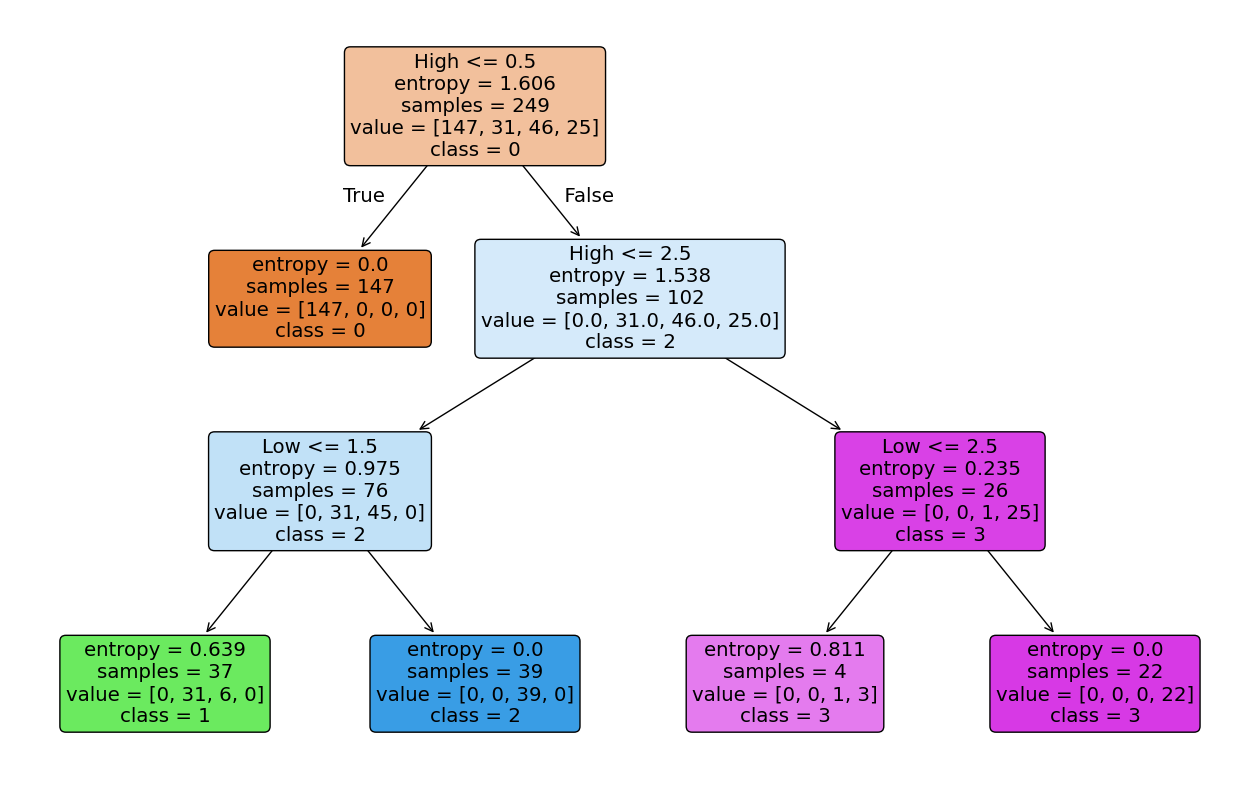

In [9]:
# Draw and visualize the decision tree constructed based on your data
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv")

# Clean numeric columns
numeric_cols = ["Price", "Open", "High", "Low", "Volume"]
for col in numeric_cols:
    df[col] = df[col].replace({',': '', 'M': 'e6', 'K': 'e3'}, regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows where target or features are missing
df = df.dropna(subset=numeric_cols)

# Binning function
def custom_binning(series, bins=4, binning_type="width"):
    if binning_type == "width":
        return pd.cut(series, bins=bins, labels=False, include_lowest=True)
    elif binning_type == "frequency":
        return pd.qcut(series, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning_type.")

# Convert all numeric features to categorical bins
for col in numeric_cols:
    df[col] = custom_binning(df[col], bins=4, binning_type="width")

# Prepare features & target
target = "Price"
X = df.drop(columns=[target, "Date", "Month", "Day", "Chg%"])
y = df[target]

# Train decision tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X, y)

plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.show()


A7

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


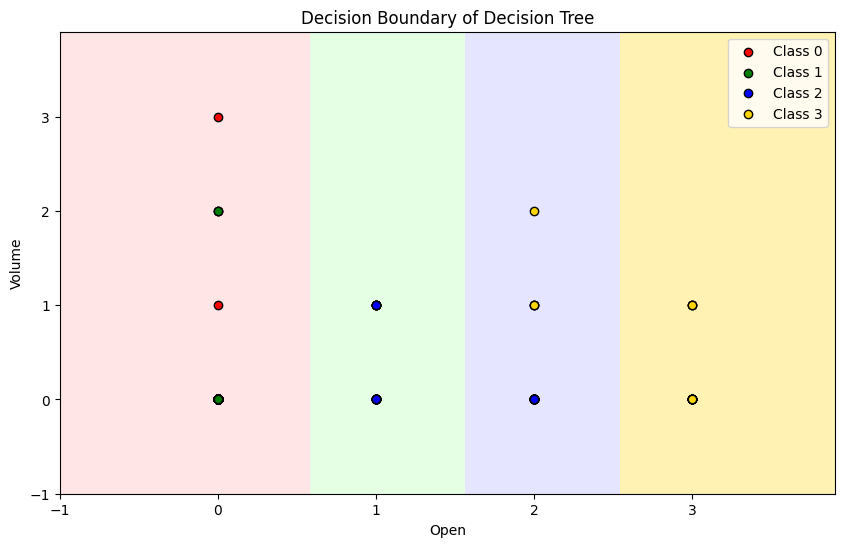

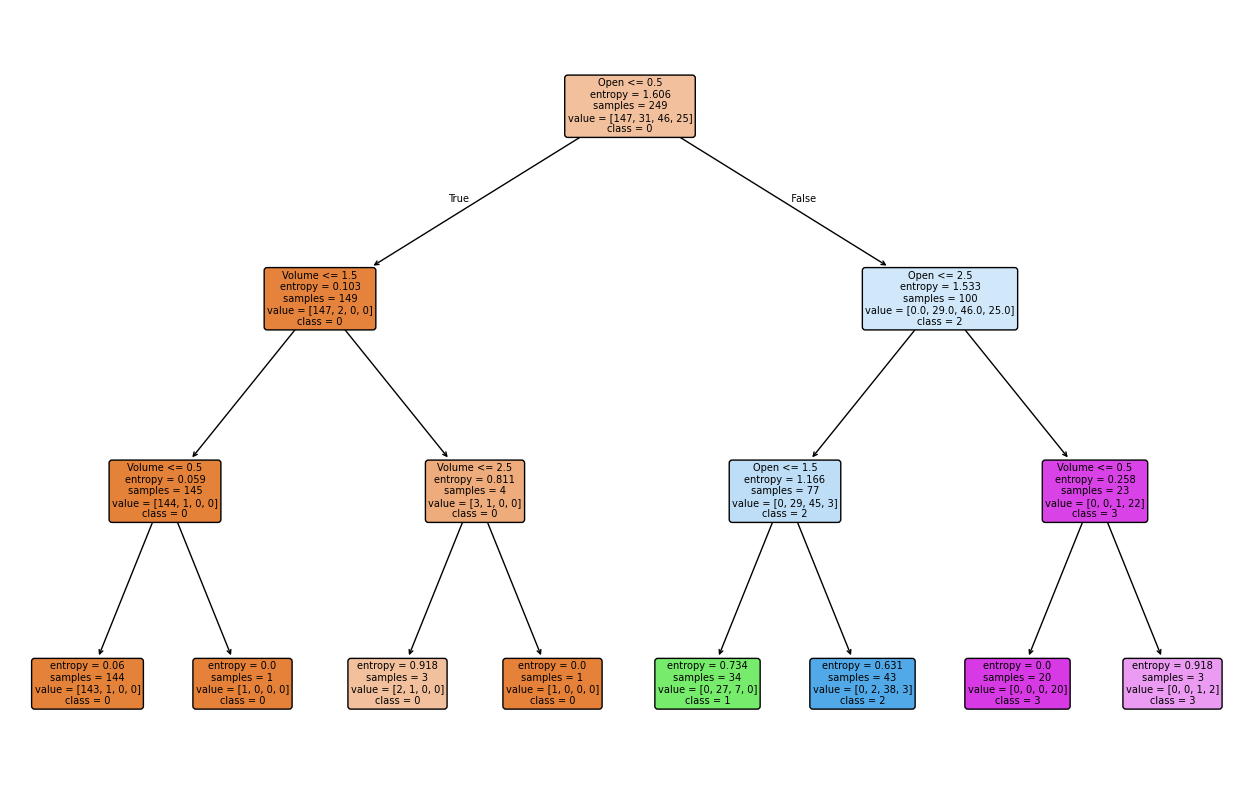

In [10]:
# Use 2 features from your dataset for a classification problem. Visualize the decision boundary created by your DT in the vector space

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

file_path = "/content/drive/MyDrive/ML Datasets/IRCTC stock price.csv"
df = pd.read_csv(file_path)

# Clean numeric columns
numeric_cols = ["Price", "Open", "High", "Low", "Volume"]
for col in numeric_cols:
    df[col] = df[col].replace({',': '', 'M': 'e6', 'K': 'e3'}, regex=True)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop rows with missing values
df = df.dropna(subset=numeric_cols)

# Binning function for classification target
def custom_binning(series, bins=4, binning_type="width"):
    if binning_type == "width":
        return pd.cut(series, bins=bins, labels=False, include_lowest=True)
    elif binning_type == "frequency":
        return pd.qcut(series, q=bins, labels=False, duplicates='drop')
    else:
        raise ValueError("Invalid binning_type.")

# Apply binning
for col in numeric_cols:
    df[col] = custom_binning(df[col], bins=4, binning_type="width")

# Choose features and target
feature1 = "Open"
feature2 = "Volume"
target = "Price"

X = df[[feature1, feature2]]
y = df[target]

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# Decision Boundary Visualization
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700'])
cmap_bold = ['red', 'green', 'blue', 'gold']

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Plot training points
for idx, cls in enumerate(np.unique(y)):
    plt.scatter(
        X[y == cls][feature1],
        X[y == cls][feature2],
        c=cmap_bold[idx],
        label=f"Class {cls}",
        edgecolor="k"
    )

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundary of Decision Tree")
plt.legend()
plt.show()

# Plot Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    clf,
    feature_names=[feature1, feature2],
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True
)
plt.show()
